## Library

In [1]:

# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Setting style and rcparams
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams["font.family"] = "sans-serif"

# For removing Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer, PowerTransformer

# Model implementation libraries
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBClassifier, XGBRegressor
import lightgbm as lgb

# For building pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Model selection libraries
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

# For performance metrics
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, log_loss, precision_score, f1_score, recall_score, auc, fbeta_score

# Other libraries
from sklearn import metrics
from sklearn import tree
from joblib import Parallel, delayed
import time
import scipy.stats as stats
import seaborn as sns
import zipfile
import os

'''
#Google Colab
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
'''

"\n#Google Colab\nfrom google.colab import drive\n# Mount Google Drive\ndrive.mount('/content/drive')\n"

##read data


In [2]:
def load_data_from_github():
    if not os.path.exists('projetml'):
        !git clone https://github.com/mathisehkirch/projetml.git

        %cd projetml

        with zipfile.ZipFile('store-sales-time-series-forecasting.zip', 'r') as zip_ref:
            zip_ref.extractall()

        %cd store-sales-time-series-forecasting

        files = os.listdir()
        csv_files = [file for file in files if file.endswith('.csv')]

        for file in csv_files:
            # Extract the name of the file (without extension) to use as variable name
            var_name = os.path.splitext(file)[0]
            # Read the CSV file and assign it to a variable with the filename as its name
            globals()[var_name] = pd.read_csv(file)

        %cd /content

    else:
        print("Data already loaded.")


In [3]:
load_data_from_github()


Cloning into 'projetml'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 21.40 MiB | 8.76 MiB/s, done.
Resolving deltas: 100% (8/8), done.
/content/projetml
/content/projetml/store-sales-time-series-forecasting
/content


In [4]:
'''
stores= pd.read_csv('/content/drive/MyDrive/ML/Projet/stores.csv')
holidays_events= pd.read_csv('/content/drive/MyDrive/ML/Projet/holidays_events.csv')
oil= pd.read_csv('/content/drive/MyDrive/ML/Projet/oil.csv')
sample_submission= pd.read_csv('/content/drive/MyDrive/ML/Projet/sample_submission.csv')
test= pd.read_csv('/content/drive/MyDrive/ML/Projet/test.csv')
train= pd.read_csv('/content/drive/MyDrive/ML/Projet/train.csv')
transactions= pd.read_csv('/content/drive/MyDrive/ML/Projet/transactions.csv')


pd.set_option('display.max_rows', 100)  # Adjust 1000 to the desired number of rows to display
pd.set_option('display.max_columns', 100)  # Adjust 1000 to the desired number of columns to display
'''

"\nstores= pd.read_csv('/content/drive/MyDrive/ML/Projet/stores.csv')\nholidays_events= pd.read_csv('/content/drive/MyDrive/ML/Projet/holidays_events.csv')\noil= pd.read_csv('/content/drive/MyDrive/ML/Projet/oil.csv')\nsample_submission= pd.read_csv('/content/drive/MyDrive/ML/Projet/sample_submission.csv')\ntest= pd.read_csv('/content/drive/MyDrive/ML/Projet/test.csv')\ntrain= pd.read_csv('/content/drive/MyDrive/ML/Projet/train.csv')\ntransactions= pd.read_csv('/content/drive/MyDrive/ML/Projet/transactions.csv')\n\n\npd.set_option('display.max_rows', 100)  # Adjust 1000 to the desired number of rows to display\npd.set_option('display.max_columns', 100)  # Adjust 1000 to the desired number of columns to display\n"

In [5]:
print('stores df:')
stores.info()
print('holidays_events df:')
holidays_events.info()
print('oil df:')
oil.info()
print('test df:')
test.info()
print('train df:')
train.info()
print('transactions df:')
transactions.info()

stores df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
holidays_events df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
oil df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218

#Data Prep

##Holiday Data Engineering


###Create Dummy

In [6]:

holidays_events = pd.concat([holidays_events.drop('locale', axis=1),
                             pd.get_dummies(holidays_events['locale'],
                                            prefix='locale',
                                            prefix_sep='_',
                                            drop_first=False,
                                            dummy_na=False).astype(int)],
                             axis=1)

holidays_events = holidays_events[['date', 'type', 'locale_name', 'description', 'transferred', 'locale_Local', 'locale_Regional', 'locale_National']]


In [7]:
holidays_events.describe(include='all')


,date,type,locale_name,description,transferred,locale_Local,locale_Regional,locale_National
count,350,350,350,350,350,350.000000,350.000000,350.000000
unique,312,6,24,103,2,NaN,NaN,NaN
top,2014-06-25,Holiday,Ecuador,Carnaval,False,NaN,NaN,NaN
freq,4,221,174,10,338,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.434286,0.068571,0.497143
std,NaN,NaN,NaN,NaN,NaN,0.496372,0.253086,0.500708
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000


###Unique attributes

In [8]:
print(holidays_events['type'].unique())
print(holidays_events['description'].unique())
print(holidays_events['locale_name'].unique())
print(holidays_events['transferred'].unique())

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
['Fundacion de Manta' 'Provincializacion de Cotopaxi'
 'Fundacion de Cuenca' 'Cantonizacion de Libertad'
 'Cantonizacion de Riobamba' 'Cantonizacion del Puyo'
 'Cantonizacion de Guaranda' 'Provincializacion de Imbabura'
 'Cantonizacion de Latacunga' 'Fundacion de Machala'
 'Fundacion de Santo Domingo' 'Cantonizacion de El Carmen'
 'Cantonizacion de Cayambe' 'Fundacion de Esmeraldas'
 'Primer Grito de Independencia' 'Fundacion de Riobamba'
 'Fundacion de Ambato' 'Fundacion de Ibarra' 'Cantonizacion de Quevedo'
 'Independencia de Guayaquil' 'Traslado Independencia de Guayaquil'
 'Dia de Difuntos' 'Independencia de Cuenca'
 'Provincializacion de Santo Domingo' 'Provincializacion Santa Elena'
 'Independencia de Guaranda' 'Independencia de Latacunga'
 'Independencia de Ambato' 'Fundacion de Quito-1' 'Fundacion de Quito'
 'Fundacion de Loja' 'Navidad-4' 'Cantonizacion de Salinas' 'Navidad-3'
 'Navidad-2' 'Puente Navidad' 'Navida

###Binning description

In [9]:

# Assuming holidays_events is your DataFrame and description is the column containing event descriptions

# Create a new column to store the category
holidays_events['category'] = 'Other'

# Historical Events
historical_keywords = ['Fundacion', 'Independencia', 'Batalla', 'Provincializacion', 'Cantonizacion', 'Traslado']
holidays_events.loc[holidays_events['description'].str.contains('|'.join(historical_keywords), case=False), 'category'] = 'Historical Events'

# Holiday and Celebration Events
holiday_keywords = ['Dia', 'Navidad', 'Carnaval', 'Viernes Santo', 'Black Friday', 'Cyber Monday', 'Puente', 'Recupero']
holidays_events.loc[holidays_events['description'].str.contains('|'.join(holiday_keywords), case=False), 'category'] = 'Holiday and Celebration Events'

# Natural Disaster Events
disaster_keywords = ['Terremoto']
holidays_events.loc[holidays_events['description'].str.contains('|'.join(disaster_keywords), case=False), 'category'] = 'Natural Disaster Events'

# Sports Events
sports_keywords = ['Mundial de futbol']
holidays_events.loc[holidays_events['description'].str.contains('|'.join(sports_keywords), case=False), 'category'] = 'Sports Events'



###Adressing Holiday Date Duplicates

In [10]:
duplicate_dates = holidays_events[holidays_events.duplicated(subset='date', keep=False)]
print("Duplicate Dates:")
#duplicate_dates

#drop description
#dummy locale_name

Duplicate Dates:


In [11]:
print("Duplicate Dates:")
duplicate_dates

Duplicate Dates:


,date,type,locale_name,description,transferred,locale_Local,locale_Regional,locale_National,category
7,2012-06-25,Holiday,Imbabura,Provincializacion de Imbabura,False,0,1,0,Historical Events
8,2012-06-25,Holiday,Latacunga,Cantonizacion de Latacunga,False,1,0,0,Historical Events
9,2012-06-25,Holiday,Machala,Fundacion de Machala,False,1,0,0,Historical Events
10,2012-07-03,Holiday,Santo Domingo,Fundacion de Santo Domingo,False,1,0,0,Historical Events
11,2012-07-03,Holiday,El Carmen,Cantonizacion de El Carmen,False,1,0,0,Historical Events
...,...,...,...,...,...,...,...,...,...
319,2017-07-03,Holiday,Santo Domingo,Fundacion de Santo Domingo,False,1,0,0,Historical Events
341,2017-12-08,Holiday,Loja,Fundacion de Loja,False,1,0,0,Historical Events
342,2017-12-08,Transfer,Quito,Traslado Fundacion de Quito,False,1,0,0,Historical Events
344,2017-12-22,Holiday,Salinas,Cantonizacion de Salinas,False,1,0,0,Historical Events


In [12]:
df = holidays_events

# Step 1: Group by the duplicate column
grouped = df.groupby('date')

# Step 2: Sum up the three integer columns within each group
summed_values = grouped[['locale_Local', 'locale_Regional', 'locale_National']].sum()

# Step 3: Merge the summed values back into the original DataFrame
df = df.merge(summed_values, left_on='date', right_index=True, suffixes=('', '_sum'))


In [13]:
df_sorted = df.sort_values(by=['date', 'locale_Local', 'locale_Regional', 'locale_National'])
df_sorted

,date,type,locale_name,description,transferred,locale_Local,locale_Regional,locale_National,category,locale_Local_sum,locale_Regional_sum,locale_National_sum
0,2012-03-02,Holiday,Manta,Fundacion de Manta,False,1,0,0,Historical Events,1,0,0
1,2012-04-01,Holiday,Cotopaxi,Provincializacion de Cotopaxi,False,0,1,0,Historical Events,0,1,0
2,2012-04-12,Holiday,Cuenca,Fundacion de Cuenca,False,1,0,0,Historical Events,1,0,0
3,2012-04-14,Holiday,Libertad,Cantonizacion de Libertad,False,1,0,0,Historical Events,1,0,0
4,2012-04-21,Holiday,Riobamba,Cantonizacion de Riobamba,False,1,0,0,Historical Events,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
344,2017-12-22,Holiday,Salinas,Cantonizacion de Salinas,False,1,0,0,Historical Events,1,0,1
346,2017-12-23,Additional,Ecuador,Navidad-2,False,0,0,1,Holiday and Celebration Events,0,0,1
347,2017-12-24,Additional,Ecuador,Navidad-1,False,0,0,1,Holiday and Celebration Events,0,0,1
348,2017-12-25,Holiday,Ecuador,Navidad,False,0,0,1,Holiday and Celebration Events,0,0,1


In [14]:
df_sorted.drop_duplicates(subset='date', keep='first', inplace=True)
df_sorted = df_sorted.drop(columns=['locale_Local', 'locale_Regional', 'locale_National'])

df_sorted

,date,type,locale_name,description,transferred,category,locale_Local_sum,locale_Regional_sum,locale_National_sum
0,2012-03-02,Holiday,Manta,Fundacion de Manta,False,Historical Events,1,0,0
1,2012-04-01,Holiday,Cotopaxi,Provincializacion de Cotopaxi,False,Historical Events,0,1,0
2,2012-04-12,Holiday,Cuenca,Fundacion de Cuenca,False,Historical Events,1,0,0
3,2012-04-14,Holiday,Libertad,Cantonizacion de Libertad,False,Historical Events,1,0,0
4,2012-04-21,Holiday,Riobamba,Cantonizacion de Riobamba,False,Historical Events,1,0,0
...,...,...,...,...,...,...,...,...,...
345,2017-12-22,Additional,Ecuador,Navidad-3,False,Holiday and Celebration Events,1,0,1
346,2017-12-23,Additional,Ecuador,Navidad-2,False,Holiday and Celebration Events,0,0,1
347,2017-12-24,Additional,Ecuador,Navidad-1,False,Holiday and Celebration Events,0,0,1
348,2017-12-25,Holiday,Ecuador,Navidad,False,Holiday and Celebration Events,0,0,1


In [15]:
df_sorted.reset_index(drop=True, inplace=True)
holidays_events = df_sorted


In [16]:
holidays_events.head(10)

,date,type,locale_name,description,transferred,category,locale_Local_sum,locale_Regional_sum,locale_National_sum
0,2012-03-02,Holiday,Manta,Fundacion de Manta,False,Historical Events,1,0,0
1,2012-04-01,Holiday,Cotopaxi,Provincializacion de Cotopaxi,False,Historical Events,0,1,0
2,2012-04-12,Holiday,Cuenca,Fundacion de Cuenca,False,Historical Events,1,0,0
3,2012-04-14,Holiday,Libertad,Cantonizacion de Libertad,False,Historical Events,1,0,0
4,2012-04-21,Holiday,Riobamba,Cantonizacion de Riobamba,False,Historical Events,1,0,0
5,2012-05-12,Holiday,Puyo,Cantonizacion del Puyo,False,Historical Events,1,0,0
6,2012-06-23,Holiday,Guaranda,Cantonizacion de Guaranda,False,Historical Events,1,0,0
7,2012-06-25,Holiday,Imbabura,Provincializacion de Imbabura,False,Historical Events,2,1,0
8,2012-07-03,Holiday,Santo Domingo,Fundacion de Santo Domingo,False,Historical Events,2,0,0
9,2012-07-23,Holiday,Cayambe,Cantonizacion de Cayambe,False,Historical Events,1,0,0


In [79]:
holidays_events.to_csv('/content/projetml/store-sales-time-series-forecasting/holidays_events.csv', index=False)

##Table Merge

In [17]:
train['test'] = 0
test['test'] = 1

data = pd.concat([train, test], axis=0)

data = data.merge(holidays_events, on='date', how='left')
data= data.merge(stores, on='store_nbr', how='left')
data= data.merge(oil, on='date', how='left')
data= data.merge(transactions, on=['date', 'store_nbr'], how='left')
data = data.set_index(['store_nbr', 'date', 'family'])
data = data.drop(index='2013-01-01', level=1)


## Data Engineering

###More Date

In [18]:
data_ = data.copy().reset_index()


data_['date'] = pd.to_datetime(data_["date"])
data_['day_of_week'] = data_['date'].dt.day_of_week
data_['day_of_year'] = data_['date'].dt.dayofyear
data_['day_of_month'] = data_['date'].dt.day
data_['month'] = data_['date'].dt.month
data_['quarter'] = data_['date'].dt.quarter
data_['year'] = data_['date'].dt.year


In [19]:
data_

,store_nbr,date,family,id,sales,onpromotion,test,type_x,locale_name,description,...,type_y,cluster,dcoilwtico,transactions,day_of_week,day_of_year,day_of_month,month,quarter,year
0,1,2013-01-02,AUTOMOTIVE,1782,2.0,0,0,NaN,NaN,NaN,...,D,13,93.14,2111.0,2,2,2,1,1,2013
1,1,2013-01-02,BABY CARE,1783,0.0,0,0,NaN,NaN,NaN,...,D,13,93.14,2111.0,2,2,2,1,1,2013
2,1,2013-01-02,BEAUTY,1784,2.0,0,0,NaN,NaN,NaN,...,D,13,93.14,2111.0,2,2,2,1,1,2013
3,1,2013-01-02,BEVERAGES,1785,1091.0,0,0,NaN,NaN,NaN,...,D,13,93.14,2111.0,2,2,2,1,1,2013
4,1,2013-01-02,BOOKS,1786,0.0,0,0,NaN,NaN,NaN,...,D,13,93.14,2111.0,2,2,2,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027613,9,2017-08-31,POULTRY,3029395,NaN,1,1,NaN,NaN,NaN,...,B,6,47.26,NaN,3,243,31,8,3,2017
3027614,9,2017-08-31,PREPARED FOODS,3029396,NaN,0,1,NaN,NaN,NaN,...,B,6,47.26,NaN,3,243,31,8,3,2017
3027615,9,2017-08-31,PRODUCE,3029397,NaN,1,1,NaN,NaN,NaN,...,B,6,47.26,NaN,3,243,31,8,3,2017
3027616,9,2017-08-31,SCHOOL AND OFFICE SUPPLIES,3029398,NaN,9,1,NaN,NaN,NaN,...,B,6,47.26,NaN,3,243,31,8,3,2017


###Exponentially weighted moving average (sales)

In [20]:
grouped_data = data_.groupby(['store_nbr', 'family'])

alphas = [0.95, 0.8, 0.65, 0.5]
lags =[1,7,30]

for a in alphas:
    for i in lags:
        data_[f'sales_lag_{i}_alpha_{a}'] = np.log1p(grouped_data['sales'].transform(lambda x: x.shift(i).ewm(alpha=a, min_periods=1).mean()))

data_['sales_lag_7_alpha_0.5'].describe()

count    3.015144e+06
mean     2.999597e+00
std      2.664481e+00
min      0.000000e+00
25%      1.497219e-02
50%      2.557301e+00
75%      5.309930e+00
max      1.109214e+01
Name: sales_lag_7_alpha_0.5, dtype: float64

In [21]:
sales_lag_columns = list(data_.filter(like="lag").columns)

In [22]:
data_

,store_nbr,date,family,id,sales,onpromotion,test,type_x,locale_name,description,...,sales_lag_30_alpha_0.95,sales_lag_1_alpha_0.8,sales_lag_7_alpha_0.8,sales_lag_30_alpha_0.8,sales_lag_1_alpha_0.65,sales_lag_7_alpha_0.65,sales_lag_30_alpha_0.65,sales_lag_1_alpha_0.5,sales_lag_7_alpha_0.5,sales_lag_30_alpha_0.5
0,1,2013-01-02,AUTOMOTIVE,1782,2.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-02,BABY CARE,1783,0.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-01-02,BEAUTY,1784,2.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-01-02,BEVERAGES,1785,1091.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-01-02,BOOKS,1786,0.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027613,9,2017-08-31,POULTRY,3029395,NaN,1,1,NaN,NaN,NaN,...,6.339158,6.024116,6.024116,6.314312,5.992898,5.992898,6.287649,5.974924,5.974924,6.252895
3027614,9,2017-08-31,PREPARED FOODS,3029396,NaN,0,1,NaN,NaN,NaN,...,3.955965,4.992324,4.992324,4.043447,4.949581,4.949581,4.171029,4.907080,4.907080,4.302869
3027615,9,2017-08-31,PRODUCE,3029397,NaN,1,1,NaN,NaN,NaN,...,7.793466,7.704375,7.704375,7.737799,7.638017,7.638017,7.681655,7.568340,7.568340,7.619194
3027616,9,2017-08-31,SCHOOL AND OFFICE SUPPLIES,3029398,NaN,9,1,NaN,NaN,NaN,...,5.281222,4.901019,4.901019,5.157989,4.962162,4.962162,5.008067,5.005573,5.005573,4.814117


##Dummies and test/train init

In [23]:

to_dummies = ['day_of_week', 'day_of_month', 'month', 'quarter', 'year', 'store_nbr', 'type_y', 'cluster', 'family', 'onpromotion', 'type_x',
              'locale_name', 'city', 'state', 'category', 'transferred']

X = data_.loc[:, [ 'day_of_week', 'day_of_month', 'month', 'quarter', 'year', 'store_nbr', 'type_y', 'cluster', 'family', 'onpromotion', 'type_x', 'category',
                  'transferred', 'locale_Local_sum',	'locale_Regional_sum',	'locale_National_sum', 'locale_name',  'city', 'state', 'test', 'sales', 'id']+ sales_lag_columns]

X[to_dummies] = X[to_dummies].astype('category')

data_train = X[X['test'] == 0]
data_test = X[X['test'] == 1]

dt_X_train = data_train.drop(['test', 'sales', 'id'],  axis=1)
dt_X_test = data_test.drop(['test', 'sales', 'id'],  axis=1)

dt_y_train = data_train['sales']


# ML

##X and y

In [24]:
TEST_SIZE = 0.2
RAND_STATE = 91

X_train, X_test, y_train, y_test = train_test_split(dt_X_train, dt_y_train, test_size = TEST_SIZE, random_state=RAND_STATE)

X_train_LGBM, X_val, y_train_LGBM, y_val = train_test_split(X_train, y_train, test_size = TEST_SIZE, random_state=RAND_STATE)

X_test_LGBM = dt_X_test.loc[:, ]


# X_test_final

## Performance Metrics Function

In [25]:

def performance_metrics(actual, prediction, train_actual, train_predicted, model=''):
    print('\033[1m' + '-----------------------------------------' + '\033[0m')
    print(f'{model} Test data R-squared Score:', r2_score(actual, prediction))
    print(f'{model} Train data R-squared Score:', r2_score(train_actual, train_predicted))
    print('\033[1m' + '-----------------------------------------' + '\033[0m')

    mse_test = mean_squared_error(actual, prediction)
    mse_train = mean_squared_error(train_actual, train_predicted)

    print(f'{model} Test data Mean Squared Error:', mse_test)
    print(f'{model} Train data Mean Squared Error:', mse_train)
    print('\033[1m' + '-----------------------------------------' + '\033[0m')

    # Plot the scatter plot of actual vs predicted values for test set
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, prediction, color='blue', label='Test Data', s=1, alpha=0.8)
    #plt.scatter(train_actual, train_predicted, color='red', label='Train Data', s=5, alpha=0.01)
    plt.title(f'{model} - Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend(loc="upper right")
    plt.show()


    actual_combined = np.concatenate([actual, prediction])

    plt.figure(figsize=(16, 12))

    # Density plot
    plt.subplot(2, 2, 1)
    sns.kdeplot(actual_combined, cmap='Blues', fill=True, bw_method=0.5)
    plt.title(f'{model} - Density Plot of Actual vs Predicted (Test Data)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    # Residual plot
    residuals = prediction - actual
    plt.subplot(2, 2, 2)
    plt.scatter(prediction, residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'{model} - Residual Plot (Test Data)')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')

    # Q-Q plot
    plt.subplot(2, 2, 3)
    stats.probplot(actual - prediction, dist="norm", plot=plt)
    plt.title(f'{model} - Q-Q Plot (Test Data)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')

    df = pd.DataFrame({'Actual': actual, 'Predicted': prediction})

    # Downsample the DataFrame
    df_sampled = df.sample(n=50000, random_state=42)

    # Create the violin plot with sampled data
    plt.subplot(2, 2, 4)
    sns.violinplot(data= df_sampled, cmap='Blues')
    plt.title(f'{model} - Violin Plot of Actual vs Predicted (Test Data)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    plt.tight_layout()
    plt.show()


##Old Algorithms

###Dict Regressors + Hyperparameters Basic Algorithm

In [26]:
'''
GB_hyper = {
    'n_estimators': 100,           # default is 100 trees
    'learning_rate': 0.1,          # Moderate learning rate (default 0.1)
    'subsample': 0.5,              # Use % of samples for each tree (default 1)
    'max_depth': 3,                # Shallow trees (default 3)
    'max_features': 'sqrt',        # Use square root of features for splitting (default none: all)
    'min_samples_split': 10,       # Require 10 samples for a split (default 2)
    'min_samples_leaf': 5,         # Require 10 samples for a leaf (default 1)
    'loss': 'squared_error',       # Default least squares loss (default squared_error)
    'alpha': 0.9,                  # Regularization parameter (default is 0.9)
    'init': None,                  # Initial estimator for predictions (default is None)
    'warm_start': False,           # Reuse solution of the previous call to fit as initialization (default is False)
    'random_state': 9009           # Random seed for random number generation (default is None)
}

DT_hyper = {
    'criterion': 'squared_error',   # The function to measure the quality of a split (default is squared error)
    'splitter': 'best',             # The strategy used to choose the split at each node (default is 'best')
    'max_depth': 10,                # The maximum depth of the tree (default is None)
    'min_samples_split': 10,         # The minimum number of samples required to split an internal node (default is 2)
    'min_samples_leaf': 5,          # The minimum number of samples required to be at a leaf node (default is 1)
    'min_weight_fraction_leaf': 0.0,# The minimum weighted fraction of the sum total of weights (default is 0.0)
    'max_features': None,           # The number of features to consider when looking for the best split (default is None)
    'random_state': 9119,           # The random seed for random number generation (default is None)
    'max_leaf_nodes': None,         # The maximum number of leaf nodes (default is None)
    'min_impurity_decrease': 0.0,   # The minimum impurity decrease required for a split to happen (default is 0.0)
    'ccp_alpha': 0.0                # The complexity parameter used for Minimal Cost-Complexity Pruning (default is 0.0)
}

RF_hyper = {
    'n_estimators': 5,         # Number of trees in the forest (default is 100)
    'criterion': 'squared_error',# Function to measure the quality of a split (default is squared error)
    'max_depth': 10,             # Maximum depth of the tree (default is None)
    'min_samples_split': 10,     # Minimum number of samples required to split an internal node (default is 2)
    'min_samples_leaf': 5,      # Minimum number of samples required to be at a leaf node (default is 1)
    'min_weight_fraction_leaf': 0.0,  # Minimum weighted fraction of the sum total of weights (default is 0.0)
    'max_features': 'auto',      # Number of features to consider when looking for the best split (default is 'auto')
    'max_leaf_nodes': None,      # Maximum number of leaf nodes (default is None)
    'min_impurity_decrease': 0.0,  # Minimum impurity decrease required for a split to happen (default is 0.0)
    'bootstrap': True,           # Whether bootstrap samples are used when building trees (default is True)
    'oob_score': False,          # Whether to use out-of-bag samples to estimate the R^2 on unseen data (default is False)
    'random_state': 9229,        # Random seed for random number generation (default is None)
    'verbose': 0,                # Controls the verbosity of the tree building process (default is 0)
    'warm_start': False,         # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble (default is False)
    'ccp_alpha': 0.0,            # Complexity parameter used for Minimal Cost-Complexity Pruning (default is 0.0)
    'max_samples': None          # If bootstrap is True, the number of samples to draw from X to train each base estimator (default is None)
}

Linear_hyper = {
    'fit_intercept': True,            # Calculate intercept (default is True)
    'copy_X': False,                   # Copy X or overwrite it (default is True)
}

Ridge_hyper = {
    'alpha': 1.0,                     # Regularization strength (default is 1.0)
    'fit_intercept': True,            # Calculate intercept (default is True)
    'copy_X': False,                  # Copy X or overwrite it (default is True)
    'max_iter': 10000,                # Maximum number of iterations for optimization (default is None)
    'tol': 0.001,                     # Tolerance for stopping criterion (default is 1e-3)
    'solver': 'auto',                 # Solver to use for optimization (default is 'auto')
    'random_state': 9999,             # Random seed for random number generation (default is None)
}

Lasso_hyper = {
    'alpha': 1.0,                     # Regularization strength (default is 1.0)
    'fit_intercept': True,            # Calculate intercept (default is True)
    'precompute': True,               # Precompute Gram matrix for faster computation (default is False)
    'copy_X': False,                  # Copy X or overwrite it (default is True)
    'max_iter': 10000,                # Maximum number of iterations for optimization (default is 1000)
    'tol': 0.0001,                    # Tolerance for stopping criterion (default is 1e-4)
    'warm_start': True,               # Reuse solution of the previous call to fit as initialization (default is False)
    'positive': False,                # Force coefficients to be positive (default is False)
    'random_state': 9889              # Random seed for random number generation (default is None)
}

dict_regressors = {
    #"Nearest Neighbors": KNeighborsRegressor(),
    #"Random Forest Regressor": RandomForestRegressor(),
    #"Neural Network Regressor": MLPRegressor(),
    #"XGBoost Regressor": XGBRegressor(),
    #"Gradient Boosting Regressor": GradientBoostingRegressor(**GB_hyper),
    "Decision Tree Regressor": tree.DecisionTreeRegressor(**DT_hyper),
    "Random Tree Regressor": RandomForestRegressor(**RF_hyper),
    "Linear Regression": LinearRegression(**Linear_hyper),
    "Ridge Regression": Ridge(**Ridge_hyper),
    "Lasso Regression": Lasso(**Lasso_hyper),
}

no_regressors = len(dict_regressors.keys())
'''

'\nGB_hyper = {\n    \'n_estimators\': 100,           # default is 100 trees\n    \'learning_rate\': 0.1,          # Moderate learning rate (default 0.1)\n    \'subsample\': 0.5,              # Use % of samples for each tree (default 1)\n    \'max_depth\': 3,                # Shallow trees (default 3)\n    \'max_features\': \'sqrt\',        # Use square root of features for splitting (default none: all)\n    \'min_samples_split\': 10,       # Require 10 samples for a split (default 2)\n    \'min_samples_leaf\': 5,         # Require 10 samples for a leaf (default 1)\n    \'loss\': \'squared_error\',       # Default least squares loss (default squared_error)\n    \'alpha\': 0.9,                  # Regularization parameter (default is 0.9)\n    \'init\': None,                  # Initial estimator for predictions (default is None)\n    \'warm_start\': False,           # Reuse solution of the previous call to fit as initialization (default is False)\n    \'random_state\': 9009           # R

###Batch Regress Method

In [27]:
'''
def batch_regress(X_train, y_train, X_test, y_test, dict_regressors, n_jobs=-1, verbose=True):
    def fit_regressor(key, regressor):
        t_start = time.perf_counter()
        regressor.fit(X_train, y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start

        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)

        train_score = r2_score(y_train, y_train_pred)
        test_score = r2_score(y_test, y_test_pred)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        return {
            'regressor': key,
            'train_score': train_score,
            'test_score': test_score,
            'mse_train': mse_train,
            'mse_test': mse_test,
            'training_time': t_diff,
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred,
            'y_train_pred_rescaled': pd.Series(scaler_Y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten(), index=y_train.index),
            'y_test_pred_rescaled': pd.Series(scaler_Y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten(), index=y_test.index)


#y = pd.Series(y_sca.flatten(), index=y.index)
        }

    results = Parallel(n_jobs=n_jobs)(delayed(fit_regressor)(key, regressor) for key, regressor in dict_regressors.items())

    df_results = pd.DataFrame(results)

    if verbose:
        for result in results:
            print("Trained {c} in {f:.2f} s".format(c=result['regressor'], f=result['training_time']))

    return df_results
'''

'\ndef batch_regress(X_train, y_train, X_test, y_test, dict_regressors, n_jobs=-1, verbose=True):\n    def fit_regressor(key, regressor):\n        t_start = time.perf_counter()\n        regressor.fit(X_train, y_train)\n        t_end = time.perf_counter()\n        t_diff = t_end - t_start\n\n        y_train_pred = regressor.predict(X_train)\n        y_test_pred = regressor.predict(X_test)\n\n        train_score = r2_score(y_train, y_train_pred)\n        test_score = r2_score(y_test, y_test_pred)\n\n        mse_train = mean_squared_error(y_train, y_train_pred)\n        mse_test = mean_squared_error(y_test, y_test_pred)\n\n        return {\n            \'regressor\': key,\n            \'train_score\': train_score,\n            \'test_score\': test_score,\n            \'mse_train\': mse_train,\n            \'mse_test\': mse_test,\n            \'training_time\': t_diff,\n            \'y_train_pred\': y_train_pred,\n            \'y_test_pred\': y_test_pred,\n            \'y_train_pred_rescal

###Batch Regress OLD

In [28]:
'''
from sklearn.metrics import mean_squared_error, r2_score

def batch_regress(X_train, y_train, X_test, y_test, verbose=True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_regressors, 1)), columns=['regressor'])
    count = 0
    for key, regressor in dict_regressors.items():
        t_start = time.perf_counter()
        regressor.fit(X_train, y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start

        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)

        train_score = r2_score(y_train, y_train_pred)
        test_score = r2_score(y_test, y_test_pred)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        df_results.loc[count, 'regressor'] = str(key)
        df_results.loc[count, 'train_score'] = train_score
        df_results.loc[count, 'test_score'] = test_score
        df_results.loc[count, 'mse_train'] = mse_train
        df_results.loc[count, 'mse_test'] = mse_test
        df_results.loc[count, 'training_time'] = t_diff

        if verbose:
            print("Trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count += 1
    return df_results
'''

'\nfrom sklearn.metrics import mean_squared_error, r2_score\n\ndef batch_regress(X_train, y_train, X_test, y_test, verbose=True):\n    df_results = pd.DataFrame(data=np.zeros(shape=(no_regressors, 1)), columns=[\'regressor\'])\n    count = 0\n    for key, regressor in dict_regressors.items():\n        t_start = time.perf_counter()\n        regressor.fit(X_train, y_train)\n        t_end = time.perf_counter()\n        t_diff = t_end - t_start\n\n        y_train_pred = regressor.predict(X_train)\n        y_test_pred = regressor.predict(X_test)\n\n        train_score = r2_score(y_train, y_train_pred)\n        test_score = r2_score(y_test, y_test_pred)\n\n        mse_train = mean_squared_error(y_train, y_train_pred)\n        mse_test = mean_squared_error(y_test, y_test_pred)\n\n        df_results.loc[count, \'regressor\'] = str(key)\n        df_results.loc[count, \'train_score\'] = train_score\n        df_results.loc[count, \'test_score\'] = test_score\n        df_results.loc[count, \'mse_t

### Training

In [29]:
#df_results = batch_regress(X_train, y_train, X_test, y_test, dict_regressors)

### Top 3 Graphs

In [30]:
'''
print(df_results.sort_values(by='test_score', ascending=False))

top_regressors = df_results.sort_values(by='test_score', ascending=False).head(3)

# Loop through top regressors
for _, row in top_regressors.iterrows():
    regressor_name = row['regressor']
    y_train_pred = row['y_train_pred']
    y_test_pred = row['y_test_pred']

    # Check the performance metrics using the predictions from df_results
    performance_metrics(y_test, y_test_pred, y_train, y_train_pred, regressor_name)

    print(y_test)
    print(y_test_pred)

'''

"\nprint(df_results.sort_values(by='test_score', ascending=False))\n\ntop_regressors = df_results.sort_values(by='test_score', ascending=False).head(3)\n\n# Loop through top regressors\nfor _, row in top_regressors.iterrows():\n    regressor_name = row['regressor']\n    y_train_pred = row['y_train_pred']\n    y_test_pred = row['y_test_pred']\n\n    # Check the performance metrics using the predictions from df_results\n    performance_metrics(y_test, y_test_pred, y_train, y_train_pred, regressor_name)\n\n    print(y_test)\n    print(y_test_pred)\n\n"

###RandomSearchCV

In [31]:
'''
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Step 1: Define the hyperparameters
DT_hyperpara = {
 #   'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],   # Measure the quality of a split (default is squared error)
 #   'splitter': ['best', 'random'],                                    # Strategy used to choose the split at each node (default is 'best')
    'max_depth': [5],                      # Maximum depth of the tree (default is None)
 #   'min_samples_split': [2, 5, 10],                               # Minimum number of samples required to split an internal node (default is 2)
 #   'min_samples_leaf': [1, 4, 6, 9],                                 # Minimum number of samples required to be at a leaf node (default is 1)
 #   'min_weight_fraction_leaf': [i / 10 for i in range(1, 10, 2)],                 # The minimum weighted fraction of the sum total of weights (default is 0.0)
 #   'max_features': ['sqrt', 'log2', None], #[i / 10 for i in range(1, 10, 2)]],   # Number of features to consider when looking for the best split
 #   'random_state': [9119],                                                         # Random seed for random number generation
 #   'min_impurity_decrease': [0.0, 0,5],#[i / 10 for i in range(1, 10, 2)],        # The minimum impurity decrease required for a split to happen (default is 0.0)
 #   'ccp_alpha': [0.0, 0,5],#[i / 10 for i in range(1, 10, 2)]                     # The complexity parameter used for Minimal Cost-Complexity Pruning (default is 0.0)
}

#Best hyperparameters: {'random_state': 9119, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'friedman_mse'}


# Step 2: Create a decision tree regressor instance
dt_regressor = DecisionTreeRegressor()

# Step 3: Perform random grid search using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt_regressor,
    param_distributions=DT_hyperpara,
    scoring = 'neg_mean_absolute_error',
    n_iter=2,  # Number of parameter settings that are sampled
    cv=2,        # Number of folds for cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit the RandomizedSearchCV object to your training data
#random_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)


# Step 5: Extract the best estimator and its corresponding hyperparameters
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)
'''

'\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\n\n# Step 1: Define the hyperparameters\nDT_hyperpara = {\n #   \'criterion\': [\'squared_error\', \'friedman_mse\', \'absolute_error\'],   # Measure the quality of a split (default is squared error)\n #   \'splitter\': [\'best\', \'random\'],                                    # Strategy used to choose the split at each node (default is \'best\')\n    \'max_depth\': [5],                      # Maximum depth of the tree (default is None)\n #   \'min_samples_split\': [2, 5, 10],                               # Minimum number of samples required to split an internal node (default is 2)\n #   \'min_samples_leaf\': [1, 4, 6, 9],                                 # Minimum number of samples required to be at a leaf node (default is 1)\n #   \'min_weight_fraction_leaf\': [i / 10 for i in range(1, 10, 2)],                 # The minimum weighted fraction of t

In [32]:
'''
# Initialiser le meilleur modèle avec les hyperparamètres optimaux
best_rf_regressor = DecisionTreeRegressor(**random_search.best_params_)

# Entraîner le meilleur modèle sur les données d'entraînement
best_rf_regressor.fit(X_train, y_train)

'''

"\n# Initialiser le meilleur modèle avec les hyperparamètres optimaux\nbest_rf_regressor = DecisionTreeRegressor(**random_search.best_params_)\n\n# Entraîner le meilleur modèle sur les données d'entraînement\nbest_rf_regressor.fit(X_train, y_train)\n\n"

In [33]:
'''
# Faire des prédictions sur les données de test
y_train_pred = best_rf_regressor.predict(X_train)
y_test_pred = best_rf_regressor.predict(X_test)

y_final_test_pred = best_rf_regressor.predict(X_test_final)
'''

'\n# Faire des prédictions sur les données de test\ny_train_pred = best_rf_regressor.predict(X_train)\ny_test_pred = best_rf_regressor.predict(X_test)\n\ny_final_test_pred = best_rf_regressor.predict(X_test_final)\n'

In [34]:
'''
performance_metrics(y_test, y_test_pred, y_train, y_train_pred, 'DecisionTreeRegressor')
'''

"\nperformance_metrics(y_test, y_test_pred, y_train, y_train_pred, 'DecisionTreeRegressor')\n"

###Submission CSV

In [35]:
'''
y_final_test_pred_inverse = scaler_Y.inverse_transform(y_final_test_pred.reshape(-1, 1))

# Convert it back to a pandas Series with the original index
y_Sub = pd.Series(y_final_test_pred_inverse.flatten(), index=X_test_final.index)

# Créer un DataFrame avec les ID et les prédictions
submission_df = pd.DataFrame({
    'id': test['id'],
    'sales': y_Sub
})

# Enregistrer le DataFrame au format CSV
submission_df.to_csv('submission.csv', index=False)
'''

"\ny_final_test_pred_inverse = scaler_Y.inverse_transform(y_final_test_pred.reshape(-1, 1))\n\n# Convert it back to a pandas Series with the original index\ny_Sub = pd.Series(y_final_test_pred_inverse.flatten(), index=X_test_final.index)\n\n# Créer un DataFrame avec les ID et les prédictions\nsubmission_df = pd.DataFrame({\n    'id': test['id'],\n    'sales': y_Sub\n})\n\n# Enregistrer le DataFrame au format CSV\nsubmission_df.to_csv('submission.csv', index=False)\n"

##LightGBM

###Preview train

In [36]:
X_train_LGBM

,day_of_week,day_of_month,month,quarter,year,store_nbr,type_y,cluster,family,onpromotion,...,sales_lag_30_alpha_0.95,sales_lag_1_alpha_0.8,sales_lag_7_alpha_0.8,sales_lag_30_alpha_0.8,sales_lag_1_alpha_0.65,sales_lag_7_alpha_0.65,sales_lag_30_alpha_0.65,sales_lag_1_alpha_0.5,sales_lag_7_alpha_0.5,sales_lag_30_alpha_0.5
2901777,3,22,6,2,2017,28,E,10,LINGERIE,0,...,1.573210e+00,1.411978e+00,2.303730,1.511089e+00,1.469474,2.286129,1.514764e+00,1.556974,2.266378,1.577969e+00
2010858,6,7,2,1,2016,30,C,3,BEVERAGES,0,...,6.822647e+00,7.250415e+00,7.100539,6.892870e+00,7.216445,7.086857,6.968767e+00,7.182557,7.069219,7.046669e+00
1420687,3,12,3,1,2015,21,B,6,BOOKS,0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
1151841,5,11,10,4,2014,28,E,10,DELI,0,...,5.457202e+00,5.547307e+00,5.679197,5.447375e+00,5.543406,5.656302,5.455396e+00,5.540931,5.653129,5.489432e+00
2438572,1,4,10,4,2016,31,B,10,BOOKS,0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947644,1,18,7,3,2017,15,C,15,HOME CARE,12,...,5.301924e+00,5.401184e+00,5.386108,5.319391e+00,5.374773,5.405276,5.324053e+00,5.357054,5.426459,5.317349e+00
2269470,4,1,7,3,2016,36,E,10,PLAYERS AND ELECTRONICS,0,...,2.375837e+00,1.696792e+00,1.497798,2.318616e+00,1.641470,1.555168,2.276301e+00,1.612621,1.613445,2.244860e+00
2854351,4,26,5,2,2017,47,A,14,HOME AND KITCHEN II,7,...,4.439186e+00,4.154176e+00,4.519645,4.403083e+00,4.293352,4.472735,4.389095e+00,4.480724,4.443945,4.401663e+00
1609507,4,26,6,2,2015,19,C,15,SCHOOL AND OFFICE SUPPLIES,0,...,6.673225e-197,1.836329e-07,0.002865,4.768880e-106,0.000045,0.023980,2.126285e-69,0.001377,0.084495,4.654470e-46


### Initialize

In [37]:

#X_test_LGBM = X_test_final.loc[:, ]

'''

https://lightgbm.readthedocs.io/en/latest/Parameters.html

For Better Accuracy --

Use large max_bin (may be slower)
max_bin, default = 255, type = int, constraints: max_bin > 1
    max number of bins that feature values will be bucketed in
    small number of bins may reduce training accuracy but may
       increase general power (deal with over-fitting)
    LightGBM will auto compress memory according to max_bin.
       For example, LightGBM will use uint8_t for feature value if max_bin=255

Use small learning_rate with large num_iterations
learning_rate, default = 0.1, type = double, constraints: learning_rate > 0.0 ;
    in dart, it also affects on normalization weights of dropped trees
num_iterations, default = 100, type = int, constraints: num_iterations >= 0

Use large num_leaves (may cause over-fitting)
num_leaves, default = 31, type = int, constraints: 1 < num_leaves <= 131072
    max number of leaves in one tree

Try dart

boosting, default = gbdt, type = enum, options: gbdt, rf, dart,
    dart, Dropouts meet Multiple Additive Regression Trees



Deal with Over-fitting --

Use small max_bin
Use small num_leaves
Use min_data_in_leaf and min_sum_hessian_in_leaf

Use bagging by set bagging_fraction and bagging_freq
Use feature sub-sampling by set feature_fraction

Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
lambda_l1 , default = 0.0, type = double,  constraints: lambda_l1 >= 0.0
lambda_l2 , default = 0.0, type = double,  constraints: lambda_l2 >= 0.0
min_gain_to_split, default = 0.0, type = double, constraints: min_gain_to_split >= 0.0
    the minimal gain to perform split
    can be used to speed up training

Try max_depth to avoid growing deep tree
max_depth, default = -1, type = int
limit the max depth for tree model. This is used to deal with over-fitting
     when #data is small. Tree still grows leaf-wise, <= 0 means no limit

Try extra_trees
extra_trees, default = false, type = bool,
    use extremely randomized trees
    if set to true, when evaluating node splits LightGBM will check only
        one randomly-chosen threshold for each feature
    can be used to speed up training
    can be used to deal with over-fitting

Try increasing path_smooth

path_smooth , default = 0, type = double, constraints: path_smooth >=  0.0
    controls smoothing applied to tree nodes, helps prevent overfitting on leaves with few samples
    if set to zero, no smoothing is applied, if path_smooth > 0 then min_data_in_leaf must be at least 2
    larger values give stronger regularization

the weight of each node is w * (n / path_smooth) / (n / path_smooth + 1) +w_p / (n / path_smooth + 1),
 where n is the number of samples in the node,w is the optimal node weight to minimise the loss
 (approximately -sum_gradients / sum_hessians), and w_p is the weight of the parent node

note that the parent output w_p itself has smoothing applied, unless it is the root node,
 so that the smoothing effect accumulates with the tree depth
'''

#['l1', 'l2']

hyper_params = {'task': 'train',
                'boosting': 'gbdt',
                'objective': 'regression',
                'metric': ['l1', 'huber', 'r2'],
                'learning_rate': 0.05,
                'num_iterations': 800,
                'feature_fraction': 0.8,
                'bagging_fraction': 0.7,'bagging_freq': 10,
                'verbose': 0,
                'extra_trees': True,
                "max_depth": 50,
                "num_leaves": 128,
                "max_bin": 512}

gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(X_train_LGBM, y_train_LGBM,
        eval_set=[(X_val, y_val)],
        eval_metric=['l1', 'huber', 'r2'])

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ign

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting='gbdt',
              extra_trees=True, feature_fraction=0.8, learning_rate=0.05,
              max_bin=512, max_depth=50, metric=['l1', 'huber', 'r2'],
              num_iterations=800, num_leaves=128, objective='regression',
              task='train', verbose=0)

###Fit

In [38]:
gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(X_train_LGBM, y_train_LGBM,
        eval_set=[(X_val, y_val)],
        eval_metric=['l1', 'huber', 'r2'])

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ign

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting='gbdt',
              extra_trees=True, feature_fraction=0.8, learning_rate=0.05,
              max_bin=512, max_depth=50, metric=['l1', 'huber', 'r2'],
              num_iterations=800, num_leaves=128, objective='regression',
              task='train', verbose=0)

### Prediction/ Graphs

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ign

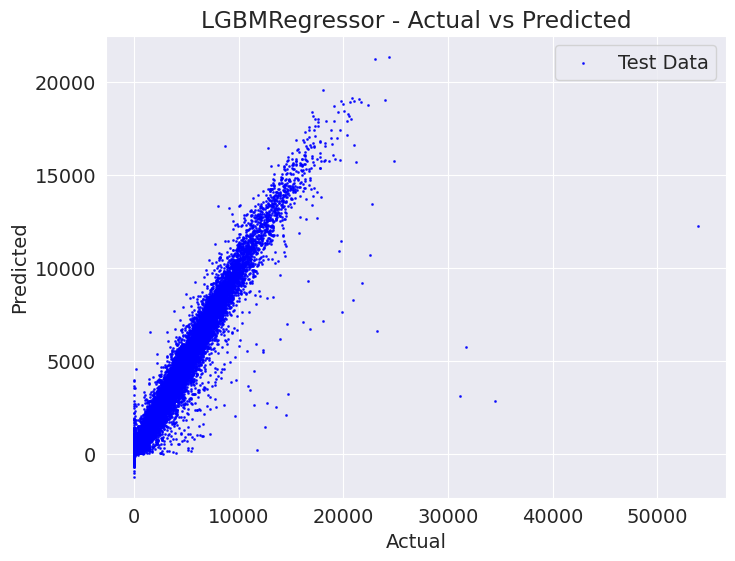

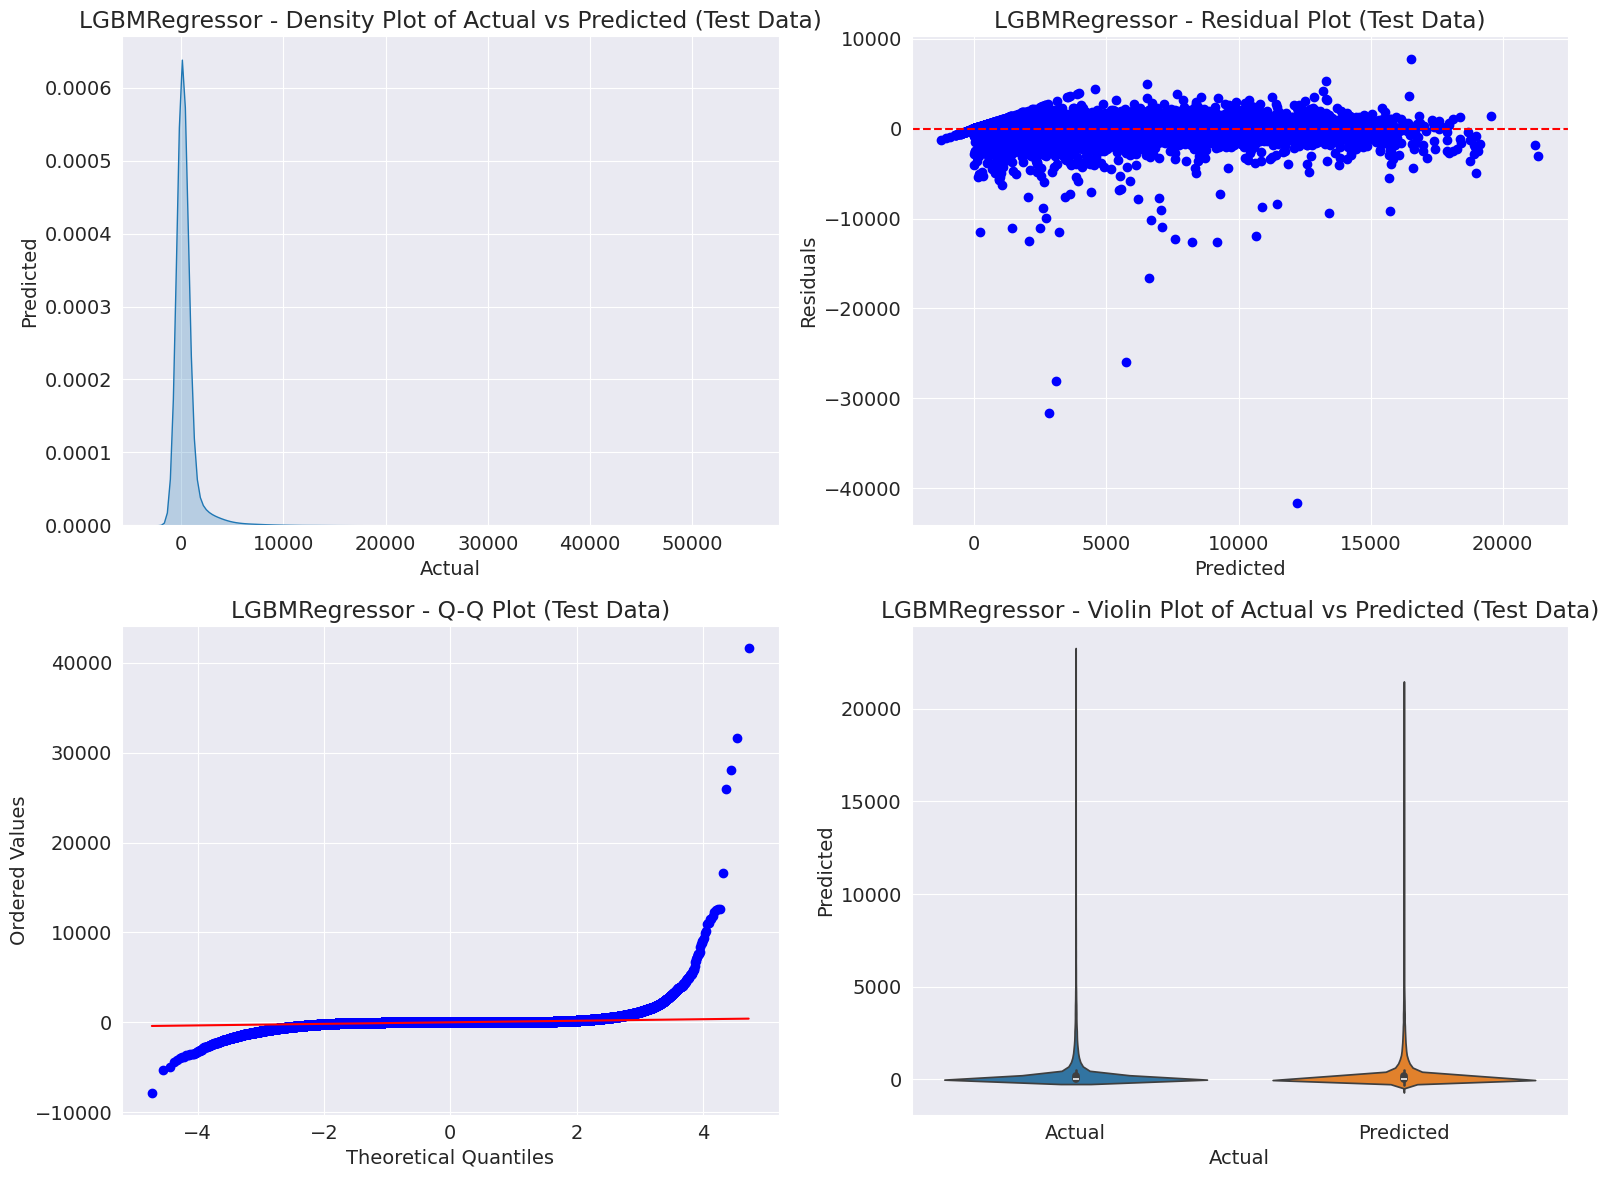

In [39]:
y_Sub = gbm.predict(X_test_LGBM)
y_pred_LGBM = gbm.predict(X_test)
y_train_pred_LGBM = gbm.predict(X_train_LGBM)


performance_metrics(y_test, y_pred_LGBM, y_train_LGBM, y_train_pred_LGBM, 'LGBMRegressor')

### Submission

In [40]:

# Créer un DataFrame avec les ID et les prédictions
submission_df = pd.DataFrame({
    'id': test['id'],
    'sales': y_Sub
})

# Enregistrer le DataFrame au format CSV
submission_df.to_csv('submission.csv', index=False)

#Streamlit

##Library

In [41]:
!pip install -q streamlit
!npm install localtunnel
import joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.046s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit 

##Save Model

In [42]:
joblib.dump(gbm, 'GBM_model.pkl')


['GBM_model.pkl']

##App Script

In [83]:
%%writefile app.py

import streamlit as st
import joblib

# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# For removing Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer, PowerTransformer

# Model implementation libraries
import lightgbm as lgb

# For building pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Model selection libraries
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

# For performance metrics
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, log_loss, precision_score, f1_score, recall_score, auc, fbeta_score

# Other libraries
from sklearn import metrics
from sklearn import tree
from joblib import Parallel, delayed
import time
import scipy.stats as stats
import seaborn as sns
import zipfile
import os


# Function to load the trained LightGBM model
def load_model(model_path):
    return joblib.load(model_path)

# Function to make predictions
def make_predictions(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def load():
    try:
        # Get the absolute path of the current directory
        current_dir = os.path.abspath(os.getcwd())
        # Change directory to 'projetml'
        os.chdir('projetml')
        # Change directory to 'store-sales-time-series-forecasting'
        os.chdir('store-sales-time-series-forecasting')
        # List all CSV files in the directory
        files = os.listdir()
        csv_files = [file for file in files if file.endswith('.csv')]
        # Read each CSV file and store it in a variable with the filename as its name
        for file in csv_files:
            # Extract the name of the file (without extension) to use as variable name
            var_name = os.path.splitext(file)[0]
            # Read the CSV file and assign it to a variable with the filename as its name
            globals()[var_name] = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), file))

        # Change directory back to the original
        os.chdir(current_dir)
    except Exception as e:
        print(f"An error occurred: {e}")



# Streamlit UI components
st.title('LightGBM Sales Prediction App')

# Load the saved model
model_path = 'GBM_model.pkl'  # Update this with the path to your saved model
st.write('Loading the trained model...')

model = load_model(model_path)
load()

st.write('Model loaded successfully!')

# Upload data to make predictions
uploaded_file = st.file_uploader('Choose a CSV file with input data...', type=['csv'])


# Make predictions if data is uploaded
if uploaded_file is not None:

  st.write('Uploaded Dataframe:')

  # Read the uploaded CSV file
  test_sub = pd.read_csv(uploaded_file)

  st.dataframe(test_sub)

  st.write('Data Modeling...')

  train1 = train.sample(n=1)

  train1['test'] = 0
  test_sub['test'] = 1 #we like

  data = pd.concat([train1, test_sub], axis=0)

  data = data.merge(holidays_events, on='date', how='left')
  data= data.merge(stores, on='store_nbr', how='left')
  data= data.merge(oil, on='date', how='left')
  data= data.merge(transactions, on=['date', 'store_nbr'], how='left')
  data = data.set_index(['store_nbr', 'date', 'family'])

  data_ = data.copy().reset_index()

  data_['date'] = pd.to_datetime(data_["date"])
  data_['day_of_week'] = data_['date'].dt.day_of_week
  data_['day_of_year'] = data_['date'].dt.dayofyear
  data_['day_of_month'] = data_['date'].dt.day
  data_['month'] = data_['date'].dt.month
  data_['quarter'] = data_['date'].dt.quarter
  data_['year'] = data_['date'].dt.year

  grouped_data = data_.groupby(['store_nbr', 'family'])

  alphas = [0.95, 0.8, 0.65, 0.5]
  lags =[1,7,30]

  for a in alphas:
    for i in lags:
      data_[f'sales_lag_{i}_alpha_{a}'] = np.log1p(grouped_data['sales'].transform(lambda x: x.shift(i).ewm(alpha=a, min_periods=1).mean()))

  sales_lag_columns = list(data_.filter(like="lag").columns)

  to_dummies = ['day_of_week', 'day_of_month', 'month', 'quarter', 'year', 'store_nbr', 'type_y', 'cluster', 'family', 'onpromotion', 'type_x',
            'locale_name', 'city', 'state', 'category', 'transferred']

  X = data_.loc[:, [ 'day_of_week', 'day_of_month', 'month', 'quarter', 'year', 'store_nbr', 'type_y', 'cluster', 'family', 'onpromotion', 'type_x', 'category',
                  'transferred', 'locale_Local_sum',	'locale_Regional_sum',	'locale_National_sum', 'locale_name',  'city', 'state', 'test', 'sales', 'id']+ sales_lag_columns]

  X[to_dummies] = X[to_dummies].astype('category')

  data_test = X[X['test'] == 1]

  test = data_test.drop(['test', 'sales', 'id'],  axis=1)

  st.write('Data Modeling successful!')

  # Assuming input_data contains the features for prediction (X_test)
  st.write('Making predictions...')
  predictions = make_predictions(model, test)
  # Créer un DataFrame avec les ID et les prédictions

  submission_df = pd.DataFrame({
      'id': test_sub['id'],
      'sales': predictions })

  # Display the predictions
  st.write('Predictions:')
  st.dataframe(submission_df)



Overwriting app.py


## Run App

In [84]:
!streamlit run app.py &>/content/logs.txt &


In [85]:
!npx localtunnel --port 8501 --header "bypass-tunnel-reminder: true"

npx: installed 22 in 2.402s
your url is: https://wide-cows-punch.loca.lt
^C


1.   Password for tunnel is in /content/logs.txt (use External URL in the format '12.123.123.123)

2.   Click link, use password

3.   Upload test.csv



#OTHER